### Image Registration
Image registration is the process of transforming images into a common coordinate system so corresponding pixels represent homologous biological points. _SimpleElastix_ is an extension of _SimpleITK_ that offers a user-friendly API to the popular image registration algorithms

In [28]:
# !pip install SimpleITK
import SimpleITK as sitk
import os
import numpy
import SimpleITK
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [29]:
def sitk_show(img, title=None, margin=0.0, dpi=40):
    nda = SimpleITK.GetArrayFromImage(img)
    #spacing = img.GetSpacing()
    figsize = (1 + margin) * nda.shape[0] / dpi, (1 + margin) * nda.shape[1] / dpi
    #extent = (0, nda.shape[1]*spacing[1], nda.shape[0]*spacing[0], 0)
    extent = (0, nda.shape[1], nda.shape[0], 0)
    fig = plt.figure(figsize=figsize, dpi=dpi)
    ax = fig.add_axes([margin, margin, 1 - 2*margin, 1 - 2*margin])

    plt.set_cmap("gray")
    ax.imshow(nda,extent=extent,interpolation=None)
    
    if title:
        plt.title(title)
    
    plt.show()

In [30]:
# Paths to the .mhd files
ct_path = "ct/ct.mhd"
mri_path = "mri/mri.mhd"

In [45]:
# reading files
ct = SimpleITK.ReadImage(ct_path)
mri = SimpleITK.ReadImage(mri_path)

# Slice index to visualize with 'sitk_show'
idxSlice = 2

# int label to assign to the segmented gray matter
labelGrayMatter = 1

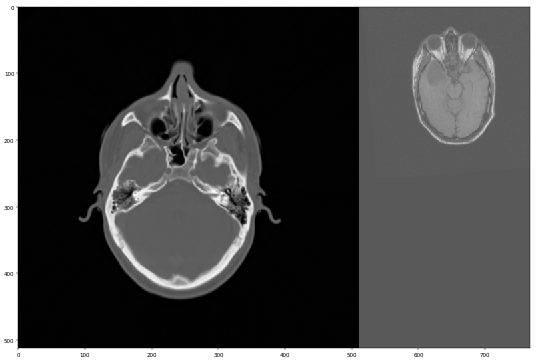

In [46]:
sitk_show(SimpleITK.Tile(ct[:, :, idxSlice],
                         mri[:, :, idxSlice],
                         (2, 1, 0)))